<a id="项目介绍"></a>

# 1.项目介绍 

在当今信息时代的大背景下，餐饮业面临着前所未有的挑战与变革，其中"四高一低"现象尤为突出，即高昂的房租、人工、能源、原材料成本与逐渐压缩的利润空间。此外，行业竞争加剧，消费者需求日益多样化，加之食品安全、顾客满意度维护等压力，传统手工管理模式下的餐饮企业难以适应市场快速变化的需求。在此情境下，餐饮企业迫切需要寻找新的生存与发展之道，利用现代信息技术与创新手段提升运营效率，降低成本，增强顾客体验，实现可持续增长。

菜品销售情况在一定程度上决定了企业是否能盈利，如何提高菜品销售量也是企业所面临的问题。制作套餐是现在企业提高销售量的一种经营方式，即组合销售，又被称为搭配销售，通常指将相关产品搭配在起成套销售的方式，组合销售的产品必须是消费者需要并且愿意购买的产品，从而突出组合销售的优点，给客户提供方便，并且提升产品销售量。


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#用于对DateFrame数值进行标准化
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.sans-serif']=['SimHei']


<a id="数据读取与查看" > </a>

# 2. 数据读取与查看

数据集来源于互联网。

数据总共分为 客户信息表、菜品详情表、订单表、订单详情表 共四个数据集



客户信息表

In [2]:
#导入客户信息表
users_august=pd.read_csv('./data/users.csv',encoding='gbk')
print(users_august.head())
print(len(users_august))

   USER_ID   MYID ACCOUNT     NAME  ORGANIZE_ID ORGANIZE_NAME  DUTY_ID   
0        1  admin   超级管理员    admin          130           根目录      NaN  \
1      981    NaN      老师  teacher          328           统计班      NaN   
2      982    NaN     叶亦凯       sx          328           统计班      NaN   
3      983    NaN     邓彬彬      lyy          328           统计班      NaN   
4      984    NaN     张建涛      zad          328           统计班      NaN   

   TITLE_ID                          PASSWORD      EMAIL  ...           TEL   
0       NaN  202cb962ac59075b964b07152d234b70  12@qq.com  ...  1.306543e+10  \
1       NaN  202cb962ac59075b964b07152d234b70        NaN  ...           NaN   
2       NaN  202cb962ac59075b964b07152d234b70        NaN  ...  1.868888e+10   
3       NaN  202cb962ac59075b964b07152d234b70        NaN  ...  1.868888e+10   
4       NaN  202cb962ac59075b964b07152d234b70        NaN  ...  1.868888e+10   

     stuNo           qq       weixin meal_arithmetic_id  arithmetic_name  sex   

字段说明：

USER_ID	用户ID ；$\quad$ 
MYID	用户自编码；$\quad$ 
ACCOUNT	账号；$\quad$ 
NAME	姓名；$\quad$ 
ORGANIZE_ID	组织代码；$\quad$ 
ORGANIZE_NAME	组织名称；$\quad$ 
PASSWORD	密码；$\quad$ 
EMAIL	电子邮箱；$\quad$ 
LANG	语言；$\quad$ 
THEME	样式；$\quad$ 
FIRST_VISIT	第一次登录；$\quad$ 
PREVIOUS_VISIT	上一次登录；$\quad$ 
LAST_VISITS	最后一次登录；$\quad$ 
LOGIN_COUNT	登录次数；$\quad$ 
ISEMPLOYEE	是否是职工；$\quad$ 
STATUS	状态；$\quad$ 
IP	IP地址；$\quad$ 
DESCRIPTION	备注；$\quad$ 
QUESTION_ID	问题代码；$\quad$ 
ANSWER	回复；$\quad$ 
ISONLINE	是否在线；$\quad$ 
CREATED	创造日期；$\quad$ 
LASTMOD	修改日期；$\quad$ 
CREATER	创建人；$\quad$ 
MODIFYER	修改人；$\quad$ 
TEL	电话；$\quad$ 
stuNo	学号；$\quad$ 
qq	QQ；$\quad$ 
weixin	微信；$\quad$ 
meal_arithmetic_id	算法ID；$\quad$ 
arithmetic_name	算法名称；$\quad$ 
sex	性别；$\quad$ 
poo	籍贯；$\quad$ 
address	地址；$\quad$ 
age	年龄；$\quad$ 


菜品详情表

In [3]:
#导入菜品详细表
dishes_df=pd.read_csv('./data/meal_dishes_detail.csv')
print(dishes_df.head())
print(len(dishes_df))

       id  dishes_class_id dishes_name  price  amt_discount  sortorder   
0  610071             3610      42度海之蓝     99             0          0  \
1  609947             3613      北冰洋汽水       5             0          0   
2  610068             3610     38度剑南春      80             0          0   
3  610069             3610     50度古井贡酒     90             0          0   
4  610070             3610    52度泸州老窖     159             0          0   

   bar_code  cost  is_info_menu_item  balance_price  ...  weight  taste   
0       NaN  50.0                NaN            NaN  ...       1      辣  \
1       NaN   2.0                NaN            NaN  ...       1     果味   
2       NaN  30.0                NaN            NaN  ...       1     爽口   
3       NaN  20.0                NaN            NaN  ...       1     爽口   
4       NaN  85.0                NaN            NaN  ...       1     清香   

  description        ingredients  label creation_method dishes_characteristic   
0         NaN         高

字段说明：

id	菜品ID ;$\quad$ 
dishes_class_id	类别ID ;$\quad$ 
dishes_name	菜品名称 ;$\quad$ 
price	菜品单价 ;$\quad$ 
amt_discount	折扣额度 ;$\quad$ 
sortorder	排序 ;$\quad$ 
bar_code	条码; $\quad$ 
cost	成本 ;$\quad$ 
is_info_menu_item	是信息菜单项 ;$\quad$ 
balance_price	抵消费用 ;$\quad$ 
pinyin	菜品拼音  ;$\quad$ 
stock_count	0：已售完，1：无限量，<0：可售分量 ;$\quad$ 
picture_file	图片文件 ;$\quad$ 
recommend_percent	推荐度 ;$\quad$ 
weight	份量 ;$\quad$ 
taste	口味 ;$\quad$ 
creation_method	制作方法 ;$\quad$ 
description	菜品描述 ;$\quad$ 
ingredients	食材 ;$\quad$ 
label	标签 ;$\quad$ 
dishes_characteristic	菜品特色 ;$\quad$ 
dept_name	部门名称 ;$\quad$ 
dishes_class_name	类别名称 ;$\quad$ 
dept_id	部门ID $\quad$ 


订单表:

In [4]:
#导入订单表
info_august=pd.read_csv('./data/meal_order_info.csv')
print(info_august.head())
print(len(info_august))

   info_id  emp_id  number_consumers  mode  dining_table_id   
0      417    1442                 4   NaN             1501  \
1      301    1095                 3   NaN             1430   
2      413    1147                 6   NaN             1488   
3      415    1166                 4   NaN             1502   
4      392    1094                10   NaN             1499   

   dining_table_name  expenditure  dishes_count  accounts_payable   
0               1022          165             5               165  \
1               1031          321             6               321   
2               1009          854            15               854   
3               1023          466            10               466   
4               1020          704            24               704   

      use_start_time  ...          lock_time cashier_id  pc_id  order_number   
0  2016/8/1 11:05:36  ...  2016/8/1 11:11:46        NaN    NaN           NaN  \
1  2016/8/1 11:15:57  ...  2016/8/1 11:31:55  

时间跨度为一个月，是2016.8.1-2016.9.1这一个月期间内的订单

字段说明：
info_id	订单ID；$\quad$ 
emp_id	会员ID(指酒店的雇员)；$\quad$ 
number_consumers	消费人数；$\quad$ 
mode	消费方式；$\quad$ 
dining_table_id	桌子ID；$\quad$ 
dining_table_name	桌子名称；$\quad$ 
expenditure	消费金额；$\quad$ 
dishes_count	总菜品数；$\quad$ 
accounts_payable	付费金额；$\quad$ 
use_start_time	开始时间；$\quad$ 
check_closed	支付结束；$\quad$ 
lock_time	锁单时间；$\quad$ 
cashier_id	收银ID；$\quad$ 
pc_id	终端ID；$\quad$ 
order_number	订单号；$\quad$ 
org_id	门店ID(org_info.id)；$\quad$ 
print_doc_bill_num	打印doc帐单的编码；$\quad$ 
lock_table_info	桌子关闭信息；$\quad$ 
order_status	0:未结算；1:结算；2：已锁单；$\quad$ 
phone	电话；$\quad$ 
name	名字$\quad$ 


订单详情表：

In [5]:
#导入订单详情表
order_detail_df=pd.read_csv('./data/meal_order_detail.csv')
print(order_detail_df.head())
print(len(order_detail_df))

   detail_id  order_id  dishes_id  logicprn_name  parent_class_name   
0        754       137     610047            NaN                NaN  \
1        753       137     609970            NaN                NaN   
2        758       137     609945            NaN                NaN   
3        755       137     609992            NaN                NaN   
4        759       137     610010            NaN                NaN   

       dishes_name  itemis_add  counts  amounts  cost   place_order_time   
0          西瓜胡萝卜沙拉           0       1       26   NaN  2016/8/3 14:01:13  \
1            麻辣小龙虾           0       1       99   NaN  2016/8/3 14:01:47   
2  农夫山泉NFC果汁100%橙汁           0       1        6   NaN  2016/8/3 14:02:11   
3        番茄炖牛腩\r\n           0       1       35   NaN  2016/8/3 14:02:37   
4            白饭/小碗           0       4        1   NaN  2016/8/3 14:04:55   

   discount_amt  discount_reason  kick_back  add_inprice  add_info  bar_code   
0           NaN              NaN    

字段说明:

detail_id	订单详情ID；$\quad$ 
order_id	订单ID；$\quad$ 
dishes_id	菜品ID；$\quad$ 
logicprn_name	类别名称；$\quad$ 
parent_class_name	父类名称；$\quad$ 
dishes_name	菜品名称；$\quad$ 
itemis_add	是否为添加菜；$\quad$ 
counts	数量；$\quad$ 
amounts	销售金额；$\quad$ 
cost	成本；$\quad$ 
place_order_time	点餐时间；$\quad$ 
discount_amt	折扣额度；$\quad$ 
discount_reason	折扣说明；$\quad$ 
kick_back	回扣；$\quad$ 
add_inprice	添加价格；$\quad$ 
add_info	添加信息；$\quad$ 
bar_code	条形码；$\quad$ 
picture_file	图片；$\quad$ 
emp_id	会员ID；$\quad$ 


<a id="数据处理"></a>

# 3.数据探索与处理





<a id="3.1"></a>

## 3.1 数据预处理




先将上面四个表数据 客户信息表 users_august、菜品详情表 dishes_df、订单表 info_august、订单详情表 order_detail_df 进行重复的检查和删除


而对于缺失，由于数据集中的缺失对核心数据的使用不影响，因此可以不用统一处理，遇见了再单独处理

<a id="a"></a>
##### 重复值处理、缺失值处理

In [6]:
# 删除重复数据
users_august.drop_duplicates(inplace=True)
dishes_df.drop_duplicates(inplace=True)
info_august.drop_duplicates(inplace=True)
order_detail_df.drop_duplicates(inplace=True)



处理数据缺失值与异常值与重复值 
通过对数据观察发现只有订单状态为1的才是有效订单，所以订单表只提取订单状态为1的订单。而对于客户价值分析中，由于需要用到最后一次消费时间，则需要在有效订单的基础上，将最后一次用餐时间为空的数据进行删除。

In [7]:
#客户价值分析预处理:

#对于用户信息表 users_august
#导入订单表 info_august
print('提取订单状态为1的数据维数:',info_august.shape)

提取订单状态为1的数据维数: (945, 21)


对于订单表数据，有效数据为正常状态的才算有效：

订单表存在未完成的订单,如订单状态0 /2,且存在其不相关、弱相关或冗余的特征 

(这两者订单可能未完成，具有不确定性，不适合作为分析数据)因此需要进行预处理


1.对用户数据进行预处理(去重、去缺失、去异常)

2.提取用户的最后一次的用餐时间，为后面的客户价值分析进行预处理

In [8]:
#对订单表info_august 进行异常值处理，提取出有效值

#提取订单状态为1的数据（即已结算订单）
info_august_new = info_august[info_august['order_status'].isin([1])]
print('提取订单状态为1的数据维数:',info_august_new.shape)
# # 重置索引
info_august_new = info_august_new.reset_index(drop=True)

# 匹配用户的最后一次用餐时间
for i in range(1, len(info_august_new)):
    num = users_august[ users_august['USER_ID'] == 
           info_august_new.iloc[i-1, 1] ].index.tolist()
    #将订单表中匹配记录的最后一次用餐时间更新到客户信息表中对应用户的‘LAST_VISITS’字段。
    users_august.iloc[num[0], 14] = info_august_new.iloc[i-1, 9]
    users_august.iloc[num[0], 14] = info_august_new.iloc[i-1, 9]
#查看订单数据信息
print(info_august_new.head())


user = users_august
#删除缺失值
user['LAST_VISITS'] = user['LAST_VISITS'].fillna(999)
user = user.drop(user[user['LAST_VISITS'] == 999].index.tolist())

print('删除缺失值后的数据维数:',user.shape)
user.drop_duplicates(inplace=True)
print('删除重复值后的数据维数:',user.shape)

#保留客户id、姓名、第一次用餐 和最后一次用餐时间
user = user.iloc[:, [0, 2, 12, 14]]

提取订单状态为1的数据维数: (933, 21)
   info_id  emp_id  number_consumers  mode  dining_table_id   
0      417    1442                 4   NaN             1501  \
1      301    1095                 3   NaN             1430   
2      413    1147                 6   NaN             1488   
3      415    1166                 4   NaN             1502   
4      392    1094                10   NaN             1499   

   dining_table_name  expenditure  dishes_count  accounts_payable   
0               1022          165             5               165  \
1               1031          321             6               321   
2               1009          854            15               854   
3               1023          466            10               466   
4               1020          704            24               704   

      use_start_time  ...          lock_time cashier_id  pc_id  order_number   
0  2016/8/1 11:05:36  ...  2016/8/1 11:11:46        NaN    NaN           NaN  \
1  2016/8/1 11:15:57 

由代码运行结果可知，原始数据meal_order_info订单表 中945条记录，删除异常值后还剩下 933条记录，删除缺失值后还剩下 558条记录。

<a id="3.2"></a>

## 3.2 数据探索与可视化

画出一个双Y轴折线图，判断时间、每日消费人数、每日营业额的关系

读取订单数据，判断餐厅这一个月的营业情况，对数据进行可视化

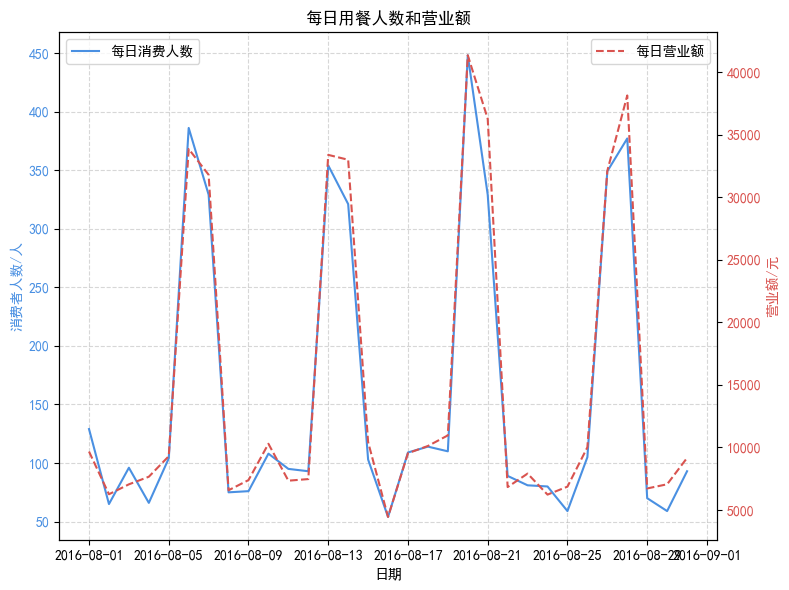

In [9]:
# 读取订单数据  info_august
order_info = pd.read_csv('./data/meal_order_info.csv')
#删除重复
order_info.drop_duplicates(inplace=True)


order_info['use_start_time'] = pd.to_datetime(order_info['use_start_time'])

# 每日用餐人数和营业额
daily_stats = order_info.groupby(order_info['use_start_time'].dt.date).agg({'number_consumers':'sum', 'expenditure':'sum'})

# 创建一个图形对象
fig, ax1 = plt.subplots(figsize=(8, 6))

# 绘制第一个子图（每日消费人数）
color = '#4a90e2'  # 更暗一点的蓝色
ax1.set_xlabel('日期')
ax1.set_ylabel('消费者人数/人', color=color)
ax1.plot(daily_stats.index, daily_stats['number_consumers'], label='每日消费人数', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# 创建第二个坐标轴用于绘制第二个变量（每日营业额）
ax2 = ax1.twinx()
color = '#d9534f'  # 更暗一点的红色
ax2.set_ylabel('营业额/元', color=color)
ax2.plot(daily_stats.index, daily_stats['expenditure'], label='每日营业额', color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# 设置标题和旋转x轴刻度
ax1.set_title('每日用餐人数和营业额')
plt.xticks(rotation=45)

# 添加网格线和美化布局
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.grid(False)

plt.tight_layout()

# 显示图表
plt.show()

由图可知，每日营业额与用餐人数存在正比关系，并且周末的用餐人数和营业额大增，工作日的用餐人数和营业额相对较低。

每餐订单的价格分布、菜品价格的分布来查看餐厅各信息，且使用双子图subplot

每餐订单的价格：将订单表的价格进行分组，求出不同价格在这一个月分别有多少个订单，然后用histplot 求出其分布的直方图和核密度曲线

菜品价格的分布图：将菜品详细表的价格进行分组，然后用histplot 求出其分布的直方图和核密度曲线



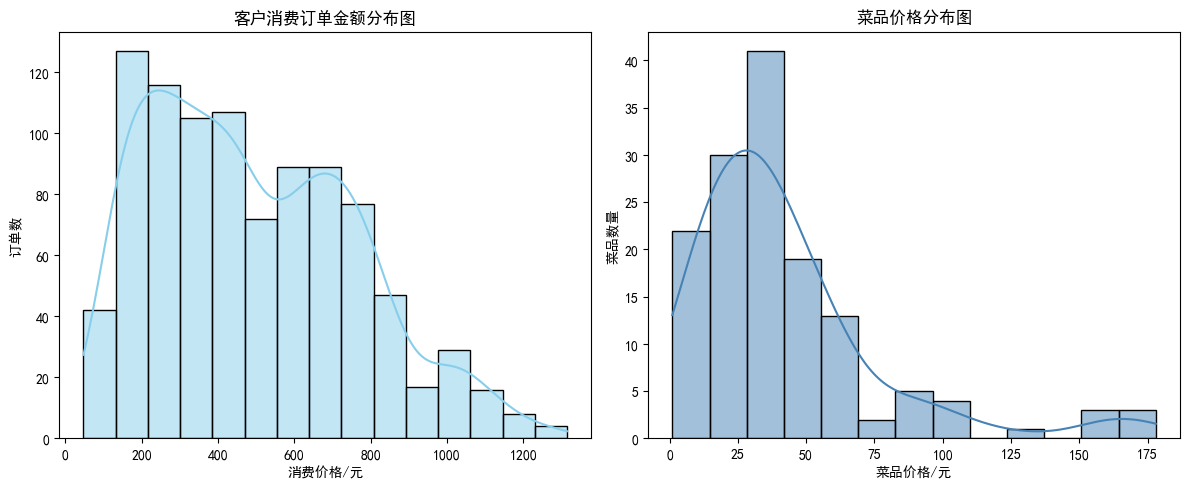

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# 设置matplotlib不显示警告信息
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1行2列

#每餐订单的价格分布:  info_august
sns.histplot(info_august['accounts_payable'], kde=True, color="skyblue", ax=axs[0])
axs[0].set_xlabel('消费价格/元')
axs[0].set_ylabel('订单数')
axs[0].set_title('客户消费订单金额分布图')


#菜品价格分布: dishes_df
sns.histplot(dishes_df['price'], kde=True,color="steelblue", ax=axs[1])
axs[1].set_xlabel('菜品价格/元')
axs[1].set_ylabel('菜品数量')
axs[1].set_title('菜品价格分布图')

# 调整子图之间的间距
plt.tight_layout()
plt.show()

客户消费订单金额分布：从左边的直方图可以看出，大部分客户的消费订单金额集中在200元到600元的范围内，其中400元左右达到峰值。随着金额的增加，订单数量逐渐减少，显示出一种典型的正态分布特征。

菜品价格分布：右边的直方图显示了不同菜品的平均价格分布情况。大多数菜品的平均价格在25元到60元之间，其中40元左右的价格区间内菜品数量最多，形成了一个明显的峰值。同样地，高价位的菜品数量较少，呈现出类似的正态分布特点。

<a id="3.3"></a>

## 3.3 属性构建

<a id="3.3.1"></a>

### 3.3.1 菜品热销度和毛利率的计算:

热销度的计算公式如下：

$$\gamma_\text{热销度评分 }=\frac{Q_i-Q_{\min}}{Q_{\max}-Q_{\min}}$$

其中，$Q_i$为某项菜品的销售份数；$Q_\mathrm{max}$为该餐饮企业最近$30$天内有销售记录的菜品中的最大销售份数；$Q_\mathrm{min}$ 为该
餐饮企业最近 30 天内有销售记录的菜品中的最小销售份数。

$$ $$

毛利率（Gross Profit Margin）是毛利与销售收入（或营业收入）的占比，其中毛利是菜品单价和与菜品相对应的成本之间的差额，计算公式如下：

$$\gamma_\text{毛利率}=\frac{\rho_\text{单价}-\rho_\text{成本}}{\rho_\text{单价}}$$

其中，$\gamma_{\text{毛利率}}$为某项菜品的毛利率修正系数，其值范围为 0.1 到 1之间，当值为负时设为 0.1; $\rho_{\text{单价}}$ 为某项菜品的单价；$\rho_{\text{成本}}$为某项菜品的估计成本。

所以我们需要将订单商品，进行分组提取，分别计算菜品究竟售出了多少份

因此，读取订单详情、菜品详情，分别计算菜品的热度、毛利率等数值

<a id="b"></a>

#### 数据链接与合并、数据分组聚合

In [11]:
#菜品热度:

# 绘制柱形图分析菜品热销度
# 已有每个菜品的销售份数数据

#读取订单详情数据  order_detail_df

#菜品详情 dishes_df

dishes_price=dishes_df[['dishes_name','price','cost']]
grouped_counts =order_detail_df.groupby('dishes_name')['counts'].sum().reset_index()

#然后将商品单价和成本也进行关联:
grouped_counts=pd.merge(dishes_price,grouped_counts,on='dishes_name')
grouped_counts


,dishes_name,price,cost,counts
0,42度海之蓝,99,50.0,25
1,北冰洋汽水,5,2.0,134
2,38度剑南春,80,30.0,24
3,50度古井贡酒,90,20.0,21
4,52度泸州老窖,159,85.0,22
...,...,...,...,...
138,纸杯蛋糕,8,3.0,41
139,重庆特色油烧兔,69,42.0,29
140,孜然羊排,88,49.0,132
141,紫薯面包卷,20,10.0,56


In [12]:
import numpy as np
from pyecharts.charts import Bar, Line, Grid
from pyecharts import options as opts  #配置项模块

#菜品热度:
#公式: (菜品份数-所有商品售出最小份数)/(max商品份数-min商品)

#所以我们需要将订单商品 进行分组提取，分别计算菜品究竟售出了多少份
count_max=grouped_counts['counts'].max()
count_min=grouped_counts['counts'].min()
grouped_counts['热度']=(grouped_counts['counts'] - count_min) / (count_max-count_min)
grouped_counts.head()

# 可视化前十个菜品热销度:
# 根据热度排序，选取前十个菜品
top_10_dishes = grouped_counts.sort_values(by='热度', ascending=False).head(10)

# 创建柱状图
bar = Bar(init_opts=opts.InitOpts(width="1000px", height="600px",bg_color="#f5f5f5"))  #背景为白色
bar.add_xaxis(top_10_dishes['dishes_name'].tolist())  #传入x轴数据 
bar.add_yaxis("菜品价格", top_10_dishes['price'].round(2).tolist())  #传入y轴数据
bar.extend_axis(yaxis=opts.AxisOpts(name="餐品热度", position="right"))
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
bar.set_global_opts(title_opts=opts.TitleOpts(title="餐馆热度前十的餐品和其售价"),
                    yaxis_opts=opts.AxisOpts(name="菜品价格/元"),
                    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45, interval=0)))

# 创建折线图
line = Line()
line.add_xaxis(top_10_dishes['dishes_name'].tolist())
line.add_yaxis("餐品热度", top_10_dishes['热度'].round(2).tolist(), yaxis_index=1)
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))

# 使用overlap将柱状图和折线图结合在一起
overlap = bar.overlap(line)

# 渲染图表
overlap.render_notebook()


In [13]:
top_10_dishes

,dishes_name,price,cost,counts,热度
7,白饭/小碗,1,0.5,560,1.000000
6,白饭/大碗,10,5.0,429,0.765653
67,凉拌菠菜,27,9.0,272,0.484794
41,谷稻小庄,38,20.0,243,0.432916
73,麻辣小龙虾,99,78.0,219,0.389982
116,五色糯米饭(七色),35,17.0,195,0.347048
28,蛋挞,8,4.0,192,0.341682
137,芝士烩波士顿龙虾,175,130.0,190,0.338104
64,辣炒鱿鱼,58,35.0,189,0.336315
125,香酥两吃大虾,89,55.0,179,0.318426


In [14]:
#计算菜品的毛利率:

#公式: (菜品单价-成本)/单价
#因此我们需要在分组的基础上计算就行
grouped_counts['毛利率']=(grouped_counts['price'] - grouped_counts['cost']) / (grouped_counts['price'])
#，毛利排前十的商品:
top_10_dishes = grouped_counts.sort_values(by='毛利率', ascending=False)
top_10_dishes.head(10)

,dishes_name,price,cost,counts,热度,毛利率
3,50度古井贡酒,90,20.0,21,0.035778,0.777778
96,清炒菊花菜,30,9.0,58,0.101968,0.700000
38,番茄甘蓝,33,10.0,80,0.141324,0.696970
118,西瓜胡萝卜沙拉,26,8.0,136,0.241503,0.692308
70,凉拌蒜蓉西兰花,29,9.0,118,0.209302,0.689655
39,番茄有机花菜,32,10.0,94,0.166369,0.687500
67,凉拌菠菜,27,9.0,272,0.484794,0.666667
111,特醇嘉士伯啤酒罐装,6,2.0,19,0.032200,0.666667
24,葱油凉拌藕片,30,10.0,67,0.118068,0.666667
90,葡萄奶酥(超酥香的饼干),9,3.0,44,0.076923,0.666667


<a id="3.3.2"></a>

### 3.3.2 构建餐饮客户价值分析关键特征

RFM 模型介绍:是一种经典的客户价值分析方法，通过评估客户的消费行为，帮助企业识别和细分客户群，以制定相应的营销策略。RFM 分析基于三个关键特征：Recency（最近一次消费时间）、Frequency（消费频率）、Monetary（消费金额）.

Recency（最近一次消费时间） 定义： Recency 指的是客户最近一次购买距离当前时间的间隔天数。 重要性： 最近一次消费时间越短的客户，通常表示该客户对公司的服务或产品仍然感兴趣，是活跃客户的可能性较高。 通过分析 Recency，可以识别近期活跃客户和可能流失的客户，进而采取相应的营销策略。 计算方法： Recency = 当前日期 - 最后一次消费日期

Frequency（消费频率） 定义： Frequency 指的是在特定时间段内客户的消费次数。 重要性： 消费频率高的客户通常表明他们对产品或服务的忠诚度较高，是公司的重要客户。 通过分析 Frequency，可以识别高频客户，并为其提供会员奖励或特别优惠，进一步提高客户忠诚度。 计算方法： 在特定时间段内统计每个客户的消费次数。例如： Frequency = 某段时间内的购买次数（如一年内的购买次数）

Monetary（消费金额） 定义： Monetary 指的是在特定时间段内客户的消费总金额。 重要性： 高消费金额的客户通常是公司的高价值客户，对公司的收入贡献较大。 通过分析 Monetary，可以识别消费能力强的客户，并提供定制化的高端服务或产品，提升客户满意度和再次消费的可能性。 计算方法： 在特定时间段内统计每个客户的总消费金额。例如： Monetary = 某段时间内的累计消费金额（如一年内的消费总额） RFM 特征的综合应用 通过对 RFM 特征的评分，可以对客户进行细分，了解不同客户群的行为特征，从而制定更加精准的营销策略。例如： 最佳客户（Recency 高、Frequency 高、Monetary 高）：近期频繁购买且消费金额较高的客户。 潜在流失客户
（Recency 低、Frequency 低、Monetary 高）：很久没有购买但消费金额较高的客户。 新客户（Recency 高、Frequency 低、Monetary 中）：最近开始购买但消费次数较少的客户。 低价值客户（Recency 低、Frequency 低、Monetary 低）：很久没有购买且消费金额较低的客户。


从订单数据的角度进行处理，进行客户的信息提取(近一个月有花销的客户)，共469位



In [15]:
#构建F特征: 每个人的用餐次数:
#则统计(订单数据)info_august_new 查看id的订单次数:
user_value1=pd.DataFrame(info_august_new['emp_id'].value_counts().reset_index())
user_value1.columns=['USER_ID','F']  #修改列名为 uesr_id 和F
# print('F特征的分布:',user_value1['F'].unique)
print('F特征的最大值:',max(user_value1['F']))
print('F特征的最小值:',min(user_value1['F']))



#构建M特征(消费金额):
user_value2 = info_august_new[['emp_id', 'expenditure']].groupby(by='emp_id').sum()
user_value2 = pd.DataFrame(user_value2).reset_index()
user_value2.columns = ["USER_ID", "M"]
#将特征进行合并: 
user_value = pd.merge(user_value1, user_value2, on='USER_ID')
print('M 特征的最大值：', max(user_value['M']))
print('M 特征的最小值：', min(user_value['M']))



#构建R特征(最近一次购买时间):
#将有表示最后一次时间的表 和上面的特征表进行合并:
import datetime as dt
user_value = pd.merge(user_value, user, on='USER_ID')

# #然后将字符串的时间 用datatime进行转换:(日期  和具体时间)
for i,k in enumerate(user_value['LAST_VISITS']):
    #i 是具体日期  k是时间
    y=k.split()
    y=pd.to_datetime(y[0])
    user_value.loc[i,'LAST_VISITS']=y
last_time=pd.to_datetime(user_value['LAST_VISITS'])
#设定观测窗口结束时间:
deadline=pd.to_datetime('2016-8-31')
#R 表示上一次 距离截止日期有多少天没来了
user_value['R']=deadline-last_time
print('R 特征的最大值：', max(user_value['R']))
print('R 特征的最小值：', min(user_value['R']))

print(user_value.head())

user_value1=user_value.iloc[:,[0,3,6,1,2]]

user_id=user_value['USER_ID']
ACCOUNT=user_value['ACCOUNT']
user_value1=user_value1.iloc[:,[2,3,4]]
user_value1.iloc[:,0]=[i.days for i in user_value1.iloc[:,0]] #提取datetime的天数,数值化

#user_value1是只有RFM三特征的df
print(len(user_value1))
print(user_value1.head())

F特征的最大值: 10
F特征的最小值: 1
M 特征的最大值： 6037
M 特征的最小值： 80
R 特征的最大值： 30 days 00:00:00
R 特征的最小值： 0 days 00:00:00
   USER_ID   F     M ACCOUNT         FIRST_VISIT          LAST_VISITS      R
0     1086  10  6037     张小雨  2015/10/1 17:04:28  2016-08-31 00:00:00 0 days
1     1147   8  4564     卓永梅  2015/2/17 13:17:01  2016-08-28 00:00:00 3 days
2     1076   8  4661      赵倩  2015/4/31 18:23:24  2016-08-30 00:00:00 1 days
3     1122   8  3667      朱钰   2014/6/5 20:13:33  2016-08-27 00:00:00 4 days
4     1103   7  5260      关庭  2015/2/13 13:22:47  2016-08-29 00:00:00 2 days
469
   R   F     M
0  0  10  6037
1  3   8  4564
2  1   8  4661
3  4   8  3667
4  2   7  5260


<a id="c"></a>

#### 数据转化(标准化)

可以根据上面特征，存在数量级的差异，则为了消除数量级上的差异，数据需要进行**标准化**:

(只提取user_id 、 R 、M 、F:)

In [16]:
print(user_value1.head())

#标准差标准化
#sklearn.preprocessing 模块中的 StandardScaler 类来标准化 user_value 数据框中的数据。
# 标准化是一种常见的数据预处理步骤，可以将数据的均值调整为 0，标准差调整为 1。
standard=StandardScaler().fit_transform(user_value1)
print(standard)
print(len(standard))

   R   F     M
0  0  10  6037
1  3   8  4564
2  1   8  4661
3  4   8  3667
4  2   7  5260
[[-1.66012717  5.05680698  5.74031189]
 [-1.30231483  3.7942877   4.06905232]
 [-1.54085639  3.7942877   4.17910811]
 ...
 [ 0.84455918 -0.62452979 -0.47386912]
 [ 0.84455918 -0.62452979 -0.07449141]
 [-1.30231483 -0.62452979 -0.25489214]]
469


<a id="模型构建"></a>

# 4.对菜品套餐、客户价值分析进行模型构建:

<a id="4.1"></a>

## 4.1 对菜品套餐进行选取进行分析
<a id="4.1.1"></a>


<a id="4.1.1"></a>

### 4.1.1 Apriori模型实现菜品的关联分析

结合菜品热销度、毛利率和店家主推菜品等综合因素，为菜品制定套餐，提高某餐饮企业的销售量。

构建Apriori模型进行菜品关联分析之前，需要先构建购物篮数据和购物篮二元矩阵。

在订单详情表中的数据样本是单个菜品的订单信息，但是实现菜品间的关联分析需要找到客户在某个订单中同时有哪些菜品，即所谓的购物篮数据。对数据预处理后的订单详情表的菜品数据转换为购物篮数据

导入数据，且发现'蒙古烤羊腿'导入的时候出现特殊无用字符，需要进行清洗

In [17]:
#根据订单详情order_detail_df: 根据订单id进行分组: 

# 清理dishes_name列中的特殊字符
order_detail_df['dishes_name'] = order_detail_df['dishes_name'].str.strip()

In [18]:

# # #groupby 进行检验是否订单都是2个:
# temp1=dishes_order_infosales.groupby(by='order_id')['dishes_name'].apply(list)
# temp1[137]

#转换为透视表(购物篮格式)
temp=pd.pivot_table(order_detail_df[['order_id','dishes_name']],
                    index='order_id',
                    columns='dishes_name', #根据columns不同的取值转为列名展示
                    aggfunc=np.count_nonzero,
                    fill_value=0) #表示当某个用户对于某种行为没有记录时，对应的单元格填充的值为0，以保持数据完整性。
temp.reset_index(inplace=True)
temp

# temp.columns=grouped_counts['dishes_name'].tolist()

# #但是还是需要将为2的改为1
temp_basket = temp.set_index('order_id')
temp_basket[temp_basket > 0] = 1


# #成功转换为购物篮格式:
#以下就是二元矩阵
# temp_basket.to_excel('购物篮数据.xlsx')
temp_basket.head()

dishes_name,38度剑南春,42度海之蓝,50度古井贡酒,52度泸州老窖,53度茅台,一品香酥藕,三丝鳝鱼,三色凉拌手撕兔,不加一滴油的酸奶蛋糕,五彩藕苗,...,香辣腐乳炒虾,香酥两吃大虾,鱼香肉丝拌面,鲜美鳝鱼,鸡蛋、肉末肠粉,麻辣小龙虾,黄尾袋鼠西拉子红葡萄酒,黄油曲奇饼干,黄花菜炒木耳,黑米恋上葡萄
order_id,,,,,,,,,,,,,,,,,,,,,
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
162,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
165,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#TransactionEncoder适合将数据转换为适合频繁项集挖掘的格式
from mlxtend.preprocessing import TransactionEncoder
#用来进行关联挖掘
from mlxtend.frequent_patterns import apriori, association_rules

import warnings

# 忽略特定类型的告警
warnings.filterwarnings("ignore", category=DeprecationWarning)

#再次处理:
#由于白米饭是一定需要的，可以把大小白米饭删除 饮品可以考虑是否保留

# #获取 列的所有数据，变为List
# t=grouped_counts['dishes_name'].tolist()
temp_basket=temp_basket.drop('白饭/大碗',axis=1)

# 使用Apriori算法进行关联规则挖掘频繁项集
# 最小支持度设置为0.01 (可以根据需要调整)
frequent_itemsets = apriori(temp_basket, min_support=0.01, use_colnames=True)
# 计算频繁项集的总数
num_itemsets = len(frequent_itemsets)
print("频繁项集输出:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

# 根据频繁项集生成关联规则
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=num_itemsets)
print("关联规则:")
print(rules.head(5))


频繁项集输出:
      support     itemsets
20   0.285563       (凉拌菠菜)
111  0.253715       (谷稻小庄)
137  0.229299      (麻辣小龙虾)
118  0.200637       (辣炒鱿鱼)
96   0.199575   (芝士烩波士顿龙虾)
11   0.198514  (五色糯米饭(七色))
82   0.197452      (白饭/小碗)
133  0.188960     (香酥两吃大虾)
63   0.183652        (焖猪手)
53   0.171975        (水煮鱼)
关联规则:
  antecedents consequents  antecedent support  consequent support   support   
0    (38度剑南春)  (芝士烩波士顿龙虾)            0.025478            0.199575  0.011677  \
1  (芝士烩波士顿龙虾)    (38度剑南春)            0.199575            0.025478  0.011677   
2    (香酥两吃大虾)    (42度海之蓝)            0.188960            0.018047  0.010616   
3    (42度海之蓝)    (香酥两吃大虾)            0.018047            0.188960  0.010616   
4  (芝士烩波士顿龙虾)   (50度古井贡酒)            0.199575            0.022293  0.010616   

   confidence      lift  representativity  leverage  conviction   
0    0.458333  2.296543               1.0  0.006593    1.477707  \
1    0.058511  2.296543               1.0  0.006593    1.035086   
2    0.056180

1. 支持度 (Support)：餐品交易的频繁次数;高支持度的组合可能更受欢迎，因此可能适合作为热门餐品推荐


2. 置信度 (Confidence)：已知规则中的“前件”（antecedents）发生时，“后件”（consequents）发生的条件概率。


3. 提升度(Lift)：是衡量“前件”和“后件”同时出现的频率与它们各自出现的频率的乘积相比，是更高还是更低。如果提升度大于1，则表示前件和后件之间存在正向关系。(某规则的提升度是2，这意味着前件和后件一起出现的概率是它们各自独立出现概率的两倍。)



查看支持度的前几项组合

In [20]:
#查看支持度最高的几个项集组合:
support_top=rules.sort_values(by='support', ascending=False)
# support_top=support_top[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
support_top_10=support_top.head(10)
print(support_top_10)


    antecedents consequents  antecedent support  consequent support   support   
465      (辣炒鱿鱼)      (凉拌菠菜)            0.200637            0.285563  0.097665  \
464      (凉拌菠菜)      (辣炒鱿鱼)            0.285563            0.200637  0.097665   
411      (凉拌菠菜)       (焖猪手)            0.285563            0.183652  0.087049   
410       (焖猪手)      (凉拌菠菜)            0.183652            0.285563  0.087049   
483     (麻辣小龙虾)      (凉拌菠菜)            0.229299            0.285563  0.083864   
482      (凉拌菠菜)     (麻辣小龙虾)            0.285563            0.229299  0.083864   
459      (凉拌菠菜)      (谷稻小庄)            0.285563            0.253715  0.083864   
458      (谷稻小庄)      (凉拌菠菜)            0.253715            0.285563  0.083864   
449     (蒙古烤羊腿)      (凉拌菠菜)            0.160297            0.285563  0.081741   
448      (凉拌菠菜)     (蒙古烤羊腿)            0.285563            0.160297  0.081741   

     confidence      lift  representativity  leverage  conviction   
465    0.486772  1.704608              

可以看出：(凉拌菠菜)、 (谷稻小庄)、(麻辣小龙虾)、(辣炒鱿鱼)的支持度都在20%以上，可以看成餐饮企业的招牌单点菜品。且企业需要需要注意这些菜品的备菜，防止供货不足。







绘制一个菜品关联的网络图。通过分析数据集中的频繁模式（即哪些菜品经常一起出现），该图展示了不同菜品之间的关联强度。这种类型的可视化可以帮助餐厅或食品公司了解顾客的购买习惯，从而更好地进行菜单设计、库存管理和市场推广策略制定。



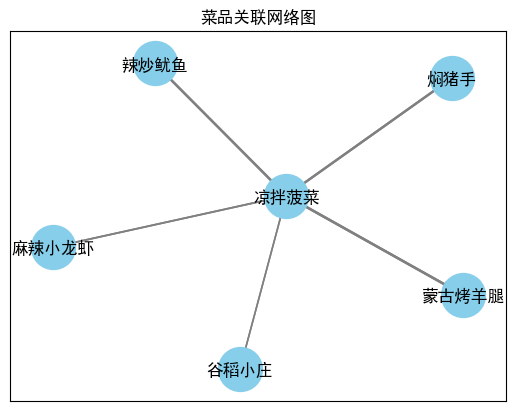

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 创建一个空的有向图
G = nx.DiGraph()

# 添加节点和边
for _, row in support_top_10.iterrows():
    antecedents = list(row['antecedents'])[0]  # 取出前项
    consequents = list(row['consequents'])[0]  # 取出后项
    lift = row['lift']  # 取出提升度
    
    G.add_node(antecedents, size=100)  # 添加前项节点
    G.add_node(consequents, size=100)  # 添加后项节点
    G.add_edge(antecedents, consequents, weight=lift)  # 添加边，权重为提升度

# 获取节点的位置
pos = nx.spring_layout(G, k=0.5, iterations=20)

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')

# 绘制边，边的粗细与提升度成正比
edges = G.edges(data=True)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray')

# 绘制节点的标签
nx.draw_networkx_labels(G, pos, font_size=12)

# 显示图表
plt.title('菜品关联网络图')
plt.show()


由上图可知：凉拌菠菜经常和谷稻小庄、蒙古烤羊腿、焖猪手、辣炒鱿鱼、麻辣小龙虾一起组合点单，是最受客户欢迎的热门套餐组合，说明味道很受客户的喜欢。



<a id="4.2"></a>

## 4.2 对客户价值分析进行模型构建



<a id="4.2.1"></a>

### 4.2.1 构建K-Means模型分析客户的价值

将使用 K-Means 算法进行餐饮公司用户分群，最终得到不同特征的客户群。

画手肘图进行确认分类类别：

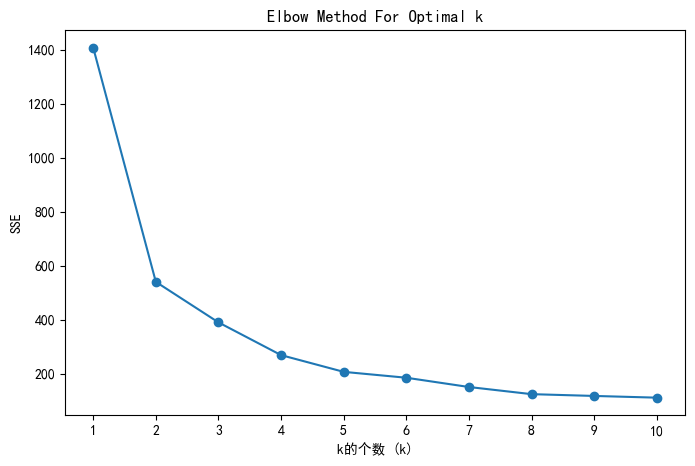

In [22]:
#建立Kmeans模型:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
#获取标准化后的数值  standard

sse = []
k_range = range(1, 11)  # 测试1到10个聚类
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standard)
    sse.append(kmeans.inertia_)  # inertia_ 是聚类内误差平方和

# 绘制手肘图
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('k的个数 (k)')
plt.ylabel('SSE')
plt.xticks(k_range)
plt.show()

SSE在K=1到K=3时下降得非常快，之后从K=4开始，SSE的下降趋势明显放缓。这表明在K=3之后，增加更多的聚类数对减少SSE的影响变得不那么显著。因此，根据手肘法，K=3可能是一个合适的聚类数选择。

聚类数目设置为3 （客户分为重要客户、一般客户、不太重要客户）

In [23]:
k=3 #聚类数
#建模:
kmeans_model=KMeans(n_clusters=k,random_state=100)
fit_kmeans=kmeans_model.fit(standard)  #模型训练
print('聚类中心: \n',kmeans_model.cluster_centers_)

聚类中心: 
 [[-0.46247917 -0.30329708 -0.31029264]
 [-1.22280098  1.70981576  1.63072329]
 [ 0.95856801 -0.55335836 -0.51034304]]


因此，可以根据k-means聚类来查看不同类别客户群体分别是那些人，进行进一步的客户消费活动来进行客户的拉拢:

#### 聚类模型的评价指标：

评价聚类模型效果的指标有很多种,其中最常用的有轮廓系数( Silhouette Coefficient,SC) 、卡林斯
基-哈拉巴斯指数( Calinski-Harabasz Index,CHI) 、兰德指数( Rand Index,RI) 、戴维森堡丁指数( Davies-
Bouldin Index,DBI) 以及权变矩阵( Contingency Matrix,CM) 等。 

本文使用轮廓系数 SC、CHI 和 DBI 作为评价指标

轮廓系数用于衡量一个样本与其所在簇中其他样本的相似程度。轮廓系数的取值范围为[ - 1,1],数据集的轮廓系数为所有样本轮廓系数的平均值。 计算出的结果越接近 1,表明聚类的效果越优秀;

CHI( k) 指各个簇之间离散程度与簇内离散程度的比率。CHI( k) 越大,说明聚类效果越好

DBI 是样本类内距离和类之间距离的比率。DBI 的值小,说明类内的距离小、类之间的距离大,聚类的效果好。


In [24]:
# 计算轮廓系数
from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_avg = silhouette_score(standard, labels)
print(f'平均轮廓系数: {silhouette_avg}')

#计算CHI(越大越好):
from sklearn.metrics import calinski_harabasz_score
# 计算Calinski-Harabasz Index
chi = calinski_harabasz_score(standard, labels)
print(f'Calinski-Harabasz Index: {chi}')

# 计算DBI(越小越好):
from sklearn.metrics import davies_bouldin_score
dbi = davies_bouldin_score(standard, labels)
print(f'Davies-Bouldin Index: {dbi}')



平均轮廓系数: 0.3917993032244936
Calinski-Harabasz Index: 594.3788190163057
Davies-Bouldin Index: 0.8405048947267393


以雷达图来展示不同客户群体的特征

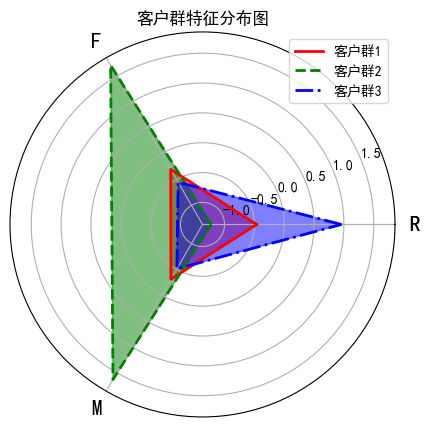

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 设置中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 绘制雷达图
# 获取第一个聚类中心的特征数量
N = len(kmeans_model.cluster_centers_[0])

# 设置雷达图的角度，用于平分切开一个圆面
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
# 为了使雷达图一圈封闭起来，将起始点添加到结尾
angles = np.concatenate((angles, [angles[0]]))

# 创建图形
fig = plt.figure(figsize=(7, 5))
# 创建一个极坐标图(雷达图)
ax = fig.add_subplot(111, polar=True)
# 定义颜色
sam = ['r', 'g', 'b']
# 定义线形
lstyle = ['-', '--', '-.']

# 用于存储各个客户群的标签
lab = []
feature = ['R', 'F', 'M']
# 确保封闭的圆形特征标签
feature.append(feature[0])

for i in range(len(kmeans_model.cluster_centers_)):
    values = kmeans_model.cluster_centers_[i]
    # 封闭圆形数据
    values = np.concatenate((values, [values[0]]))
    # 绘制折线图
    ax.plot(angles, values, color=sam[i], linestyle=lstyle[i], linewidth=2, markersize=10, label=f'客户群{i+1}')
    ax.fill(angles, values, color=sam[i], alpha=0.5)  # 填充颜色

# 设置特征标签
ax.set_thetagrids(angles * 180 / np.pi, feature, fontsize=15)

# 添加标题和网格线
plt.title('客户群特征分布图')
ax.grid(True)

# 添加图例，设置在最佳位置
plt.legend(loc='best')
plt.show()
plt.close()

针对聚类结果，如图所示，客户群2的F、M特征值最大，R特征值最小;客户群1的F、M、R特征值较小;客户群3的R特征值最大，F、M特征值最小。

结合业务分析，通过比较各个特征在群间的大小对某一个群的特征进行评价分析。如客户群2的F、M特征值最大，R特征值最小，则可以认为F、M在群2是优势特征;以此类推，F、M在群3是劣势特征。

通过上代码和上表可以看出，每个客户群的都有显著不同的表现特征，基于该特征描述，本案例定义3个等级的客户类别:重要保持客户、一般价值客户、低价值客户。每个客户类别的特征如下。

(1)重要保持客户。这类客户用餐的次数(F)和用餐总花费(M)较高，且最近在餐厅消费时间长度(R)低。他们是餐饮企业的高价值客户，是最为理想的客户类型，对企业的贡献最大，但是所占比例却最小。对这类客户，餐饮企业可以制定一对一的服务，以提高这类客户的忠诚度与满意度，尽可能延长这类客户的高水平消费。

(2)一般价值客户。这类客户用餐的次数(F)和用餐总花费(M)较低，且最近在餐厅消费时间长度(R)较低。他们是一般价值客户，虽然当前价值并不是特别高，但却有较大的发展潜力。餐饮企业可以不定期的制定相应的营销策略，刺激这类客户的消费，加强这类客户的满意度。

(3)低价值客户。这类客户用餐的次数(F)和用餐总花费(M)较低，且最近在餐厅消费时间长度(R)较高。他们是餐饮企业的低价值客户，可能是某一次经过顺便消费的，也可能是因为刚开业时有折扣所以才来本店消费，之后来消费的概率比较小。

因此：

客户群1的F、M、R特征值较小，是一般价值客户；

客户群2的F、M特征值最大，R特征值最小，是重要保持客户；

客户群3的R特征值最大，F、M特征值最小，是低价值客户。




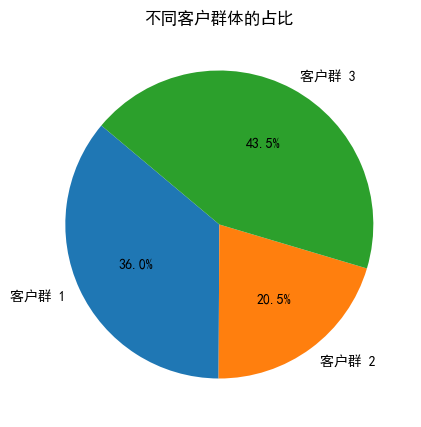

In [26]:
#画餐饮企业原不同客户群体的占比：
# 计算每个类别的样本数量
labels = fit_kmeans.labels_
cluster_counts = np.bincount(labels)

# 计算每个类别的占比
cluster_proportions = cluster_counts / len(labels)

# 绘制饼图
plt.figure(figsize=(8, 5))
plt.pie(cluster_proportions, labels=[f'客户群 {i+1}' for i in range(k)], autopct='%1.1f%%', startangle=140
        )
plt.title('不同客户群体的占比')
plt.show()

可以看出在该餐饮企业的客户群体中，客户群2(重要保持客户)占20.5%，客户群1(一般价值客户)占36%，客户群3(低价值客户)占43.5%。因此企业需要进一步对重要保持客户进行推送活动优惠，吸引客户的消费。

### 4.2.2 DBSCAN进行分类


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


#standard是RFM模型的三个特征标准化后的结果

eps值不应该大于数据集中任意两个最近点之间的最大距离  ： eps< min(任意两点的最大距离)

先根据RFM模型标准化后的特征，求出任意两点之间的最大距离，用来限制eps



In [28]:
from scipy.spatial.distance import cdist

# 计算所有点对之间的欧氏距离
distances = cdist(standard, standard, metric='euclidean')

# 初始化变量以存储当前发现的最大距离中的最小值
min_max_distance = float('inf')

# 初始化一个数组用于保存每个点到其他所有点的最大距离
max_distances = []

# 对于每一个点，找到它与其他所有点的最大距离
for i in range(len(standard)):
    max_dist_for_point = 0
    for j in range(len(standard)):
        if i != j and distances[i][j] > max_dist_for_point:
            max_dist_for_point = distances[i][j]
    max_distances.append(max_dist_for_point)

# 在所有点的最大距离中找到最小的那个
min_max_distance = min(max_distances)

print("任意两个点之间的最小最大距离为:", min_max_distance)


任意两个点之间的最小最大距离为: 4.988860864360426


因此eps最大不能超过 4.988

#### 参数选取1(基础默认法)：K-Distance 图判断eps

定K邻域参数k,对于数据中的每个点，计算对应的第k个最近邻域距离，并将数据集所有点对应的最近邻域距离按照降序方式排序，称这幅图为排序的k距离图，选择该图中第一个谷值点位置对应的k距离值设定为Eps.


eps由K-Distance图的拐点决定，而minpits由 k+1确定

MinPts的选取有一个指导性的原则(a rule of thumb)，MinPts≥dim+1,其中dim表示待聚类数据的维度。MinPts设置为1是不合理的，因为设置为1，则每个独立点都是一个簇，MinPts≤2时，与层次距离最近邻域结果相同，因此，MinPts必须选择大于等于3的值。若该值选取过小，则稀疏簇中结果由于密度小于MinPts，从而被认为是边界点儿不被用于在类的进一步扩展；若该值过大，则密度较大的两个邻近簇可能被合并为同一簇。因此，该值是否设置适当会对聚类结果造成较大影响。


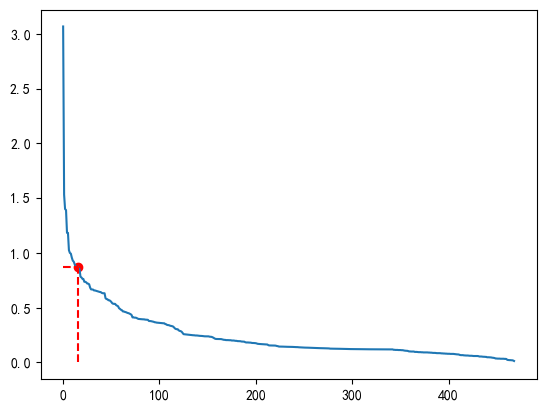

In [29]:
# 用csdn的函数
def select_MinPts(data,k):
    k_dist = []
    for i in range(data.shape[0]):
        dist = (((data[i] - data)**2).sum(axis=1)**0.5)
        dist.sort()
        k_dist.append(dist[k])
    return np.array(k_dist)
k = 5  # 此处k取 2*3 -1 
k_dist = select_MinPts(standard,k)
k_dist.sort()
plt.plot(np.arange(k_dist.shape[0]),k_dist[::-1])
# 由拐点确定邻域半径
eps = k_dist[::-1][15]
plt.scatter(15,eps,color="r")
plt.plot([0,15],[eps,eps],linestyle="--",color = "r")
plt.plot([15,15],[0,eps],linestyle="--",color = "r")
plt.show()


如果标签为-1，则表示这些点被认为是噪声点，用灰色标记它们，并设置透明度为0.5。

In [31]:
# 定义DBSCAN模型
dbscan = DBSCAN(eps=0.25, min_samples=11)  # eps和min_samples的值需要根据具体数据调整

# 拟合模型
labels = dbscan.fit_predict(standard)
#模型评估:
# 计算CHI
chi = calinski_harabasz_score(standard, labels)
print(f'Calinski-Harabasz Index: {chi}')

# 计算DBI
dbi = davies_bouldin_score(standard, labels)
print(f'Davies-Bouldin Index: {dbi}')



# 添加标签到原始数据框
user_value['Cluster'] = labels

Calinski-Harabasz Index: 390.6395241383062
Davies-Bouldin Index: 0.9527667599740485


簇分布:
 Cluster
 0    277
-1    192
Name: count, dtype: int64


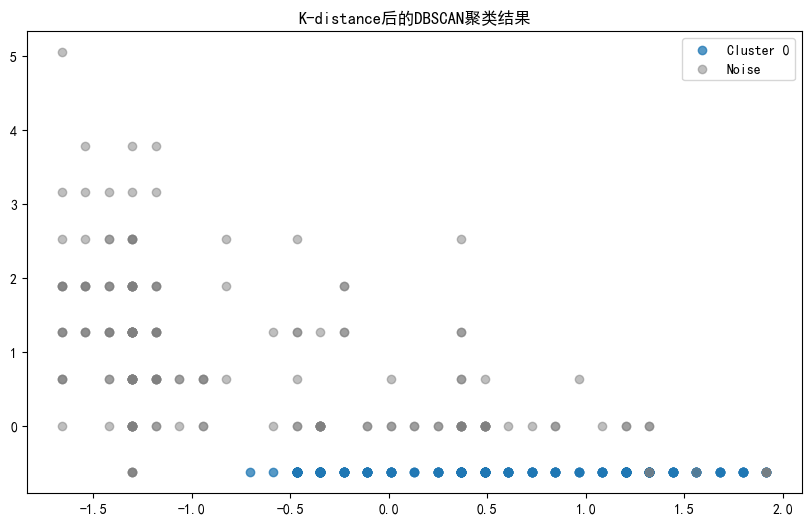

In [33]:
#结果分析

# 统计每个簇的数量
cluster_counts = user_value['Cluster'].value_counts()

# 打印结果
print("簇分布:\n", cluster_counts)

# 可视化结果
plt.figure(figsize=(10, 6))
for c in set(labels):
    if c == -1:  # -1代表噪声点
        plt.scatter(standard[labels == c, 0], standard[labels == c, 1], c='gray', alpha=0.5, label='Noise')
    else:
        plt.scatter(standard[labels == c, 0], standard[labels == c, 1], alpha=0.75, label=f'Cluster {c}')
plt.title('K-distance后的DBSCAN聚类结果')
plt.legend()
plt.show()

发现：当轮廓系数相对较好的时候，基本都是只有噪声点 和 一个有效簇

<a id="总结"></a>

# 5.总结

因此，本文有效地对餐饮企业的客户和菜品数据进行了深入分析。通过关联分析和聚类分析，我们不仅发现了菜品之间的关联规则，还识别了不同价值的客户群体。这些分析结果对于企业优化菜单结构、提高客户满意度和增强市场竞争力具有重要的指导意义。餐饮企业可以根据这些分析结果调整营销策略，提高运营效率和盈利能力。

在未来的工作中，可以需要考虑引入更多维度的数据，如客户满意度调查、市场竞争情况等，进行更全面的分析。也需要考虑时间序列分析，研究客户行为和菜品销售随时间的变化趋势。